In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Download BTC data
btc = yf.download('BTC-USD', start='2021-05-02', end='2021-12-03')
btc.dropna(inplace=True))

# 2. Technical Indicators
def add_indicators(df):
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Close_Correlation'] = df['Close'].rolling(window=20).corr(df['SMA_20'])
    return df

btc = add_indicators(btc)
btc.dropna(inplace=True)

# 3. Feature Selection
features = ['Close', 'SMA_20', 'Daily_Return', 'Close_Correlation']
data = btc[features].copy()

# 4. Drop NaNs created by indicators
data.dropna(inplace=True)

SyntaxError: unmatched ')' (1979056430.py, line 11)

In [ ]:
# 5. Create target column: next day's closing price
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Ensure data is not empty before scaling
if not data[features].empty:
	# 6. Feature Scaling
	scaler = MinMaxScaler()
	X_scaled = scaler.fit_transform(data[features])
	y = data['Target'].values

	# 7. Train/Test Split
	split = int(0.8 * len(X_scaled))
	X_train, X_test = X_scaled[:split], X_scaled[split:]
	y_train, y_test = y[:split], y[split:]
else:
	raise ValueError("The dataset is empty after dropping NaN values. Check your data preprocessing steps.")

ValueError: The dataset is empty after dropping NaN values. Check your data preprocessing steps.

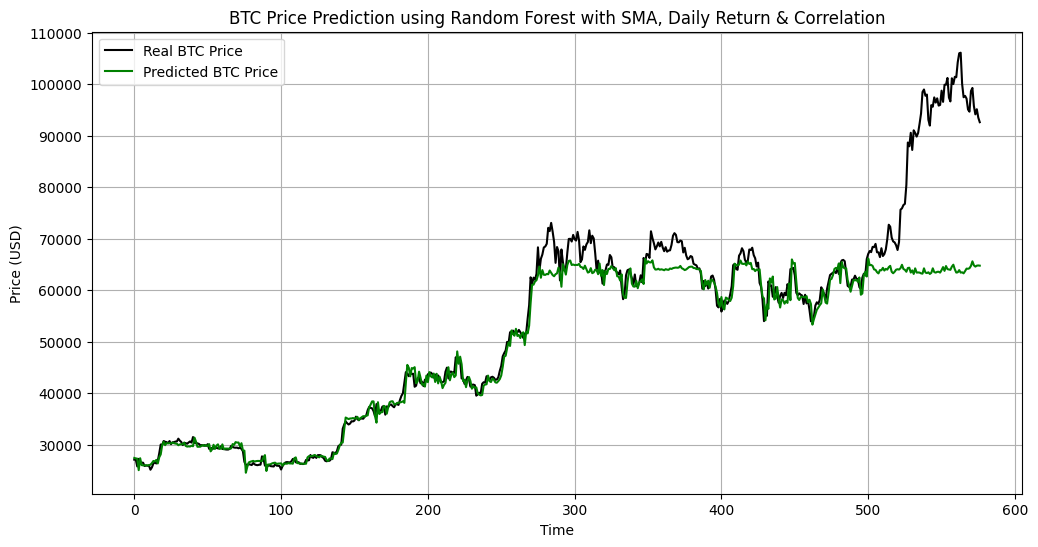

In [ ]:
# 8. Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Plot
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Real BTC Price', color='black')
plt.plot(y_pred, label='Predicted BTC Price', color='green')
plt.title('BTC Price Prediction using Random Forest with SMA, Daily Return & Correlation')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 9973.28


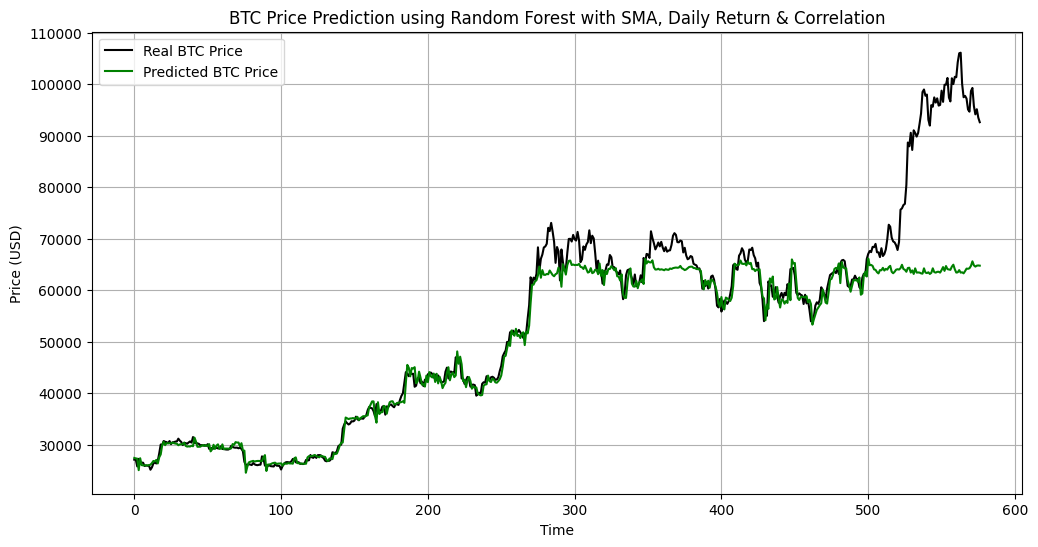

In [ ]:
# 8. Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Plot
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Real BTC Price', color='black')
plt.plot(y_pred, label='Predicted BTC Price', color='green')
plt.title('BTC Price Prediction using Random Forest with SMA, Daily Return & Correlation')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Download BTC data
btc = yf.download('BTC-USD', start='2017-01-01', end='2024-12-31')
btc.dropna(inplace=True)

# 2. Technical Indicators
def add_indicators(df):
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Close_Correlation'] = df['Close'].rolling(window=20).corr(df['SMA_20'])
    return df

btc = add_indicators(btc)
btc.dropna(inplace=True)

# 3. Feature Selection
features = ['Close', 'SMA_20', 'Daily_Return', 'Close_Correlation']
data = btc[features].copy()

# 4. Drop NaNs created by indicators
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
